In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [16]:
import polars as pl
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from playground.eda.visualization import plot_columns_and_target_factors


# Load data

In [3]:
TRAIN_FILE_PATH = Path.cwd() / "train.csv"
assert TRAIN_FILE_PATH.exists()
assert TRAIN_FILE_PATH.is_file()


In [4]:
df = pl.read_csv(TRAIN_FILE_PATH)
df


id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
i64,f64,f64,f64,f64,f64,f64,f64,i64,f64
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
5,350.0,0.0,0.0,203.0,0.0,1055.0,775.0,7,37.43
6,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,28,35.1
7,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,45.94
8,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,42.14


# Check for missing values

In [5]:
df.null_count()


id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


# Visualize the data

In [7]:
def scatter_plot(df: pl.DataFrame, x_column_name: str, y_column_name: str = 'Strength') -> None:
    plt.scatter(df[x_column_name], df[y_column_name], alpha=0.1)
    plt.xlabel(x_column_name)
    plt.ylabel(y_column_name)

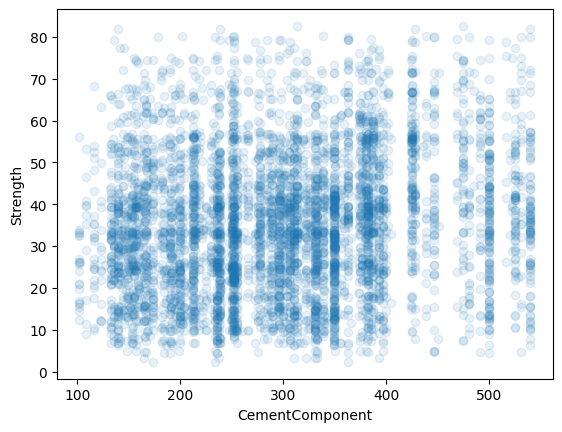

In [8]:
scatter_plot(df, 'CementComponent')

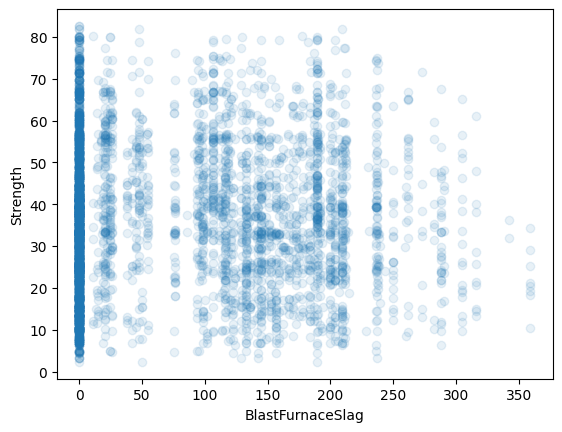

In [9]:
scatter_plot(df, 'BlastFurnaceSlag')


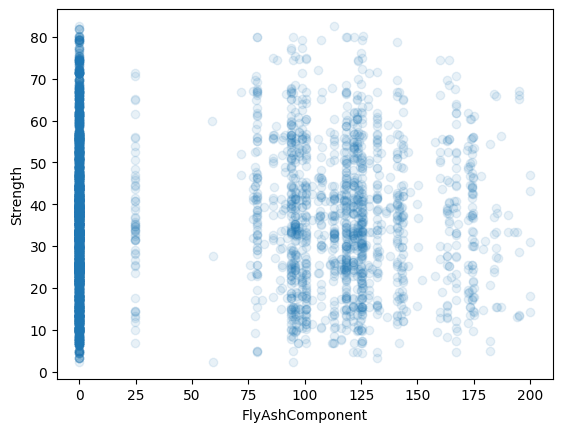

In [10]:
scatter_plot(df, 'FlyAshComponent')

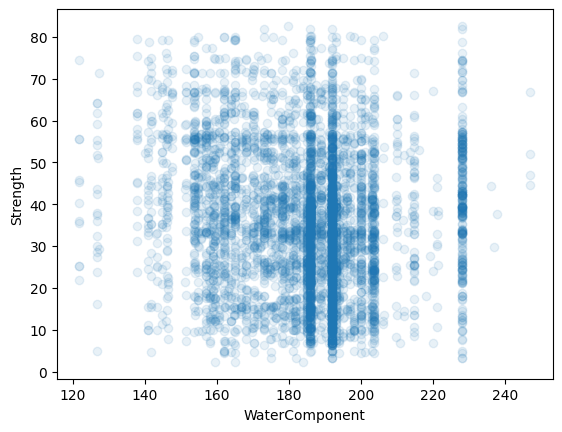

In [11]:
scatter_plot(df, 'WaterComponent')

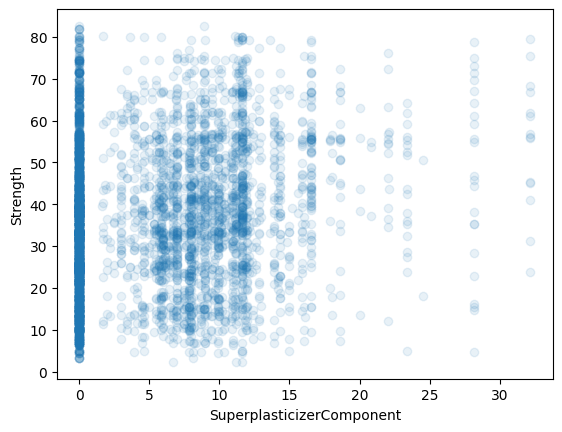

In [12]:
scatter_plot(df, 'SuperplasticizerComponent')

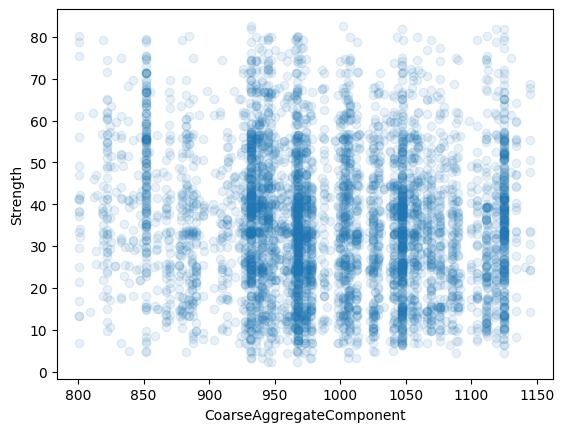

In [13]:
scatter_plot(df, 'CoarseAggregateComponent')

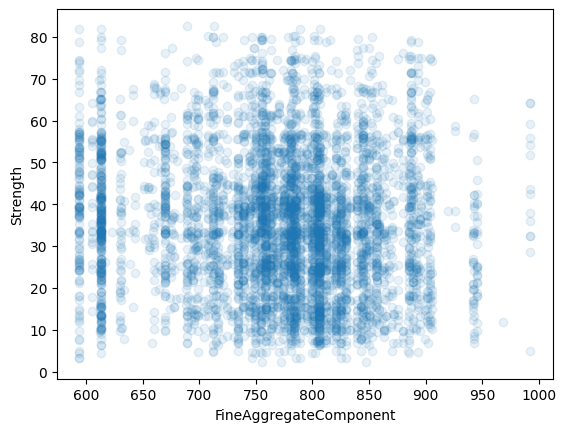

In [14]:
scatter_plot(df, 'FineAggregateComponent')

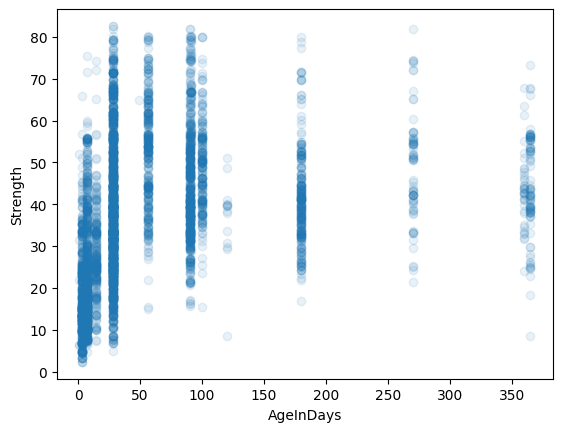

In [15]:
scatter_plot(df, 'AgeInDays')

# PCA

In [17]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(
    df.select(pl.exclude(["id", "Strength"])).to_numpy()
)
df = df.with_columns([
    pl.Series(name='pca_0', values=transformed[:, 0]),
    pl.Series(name='pca_1', values=transformed[:, 1]),
])

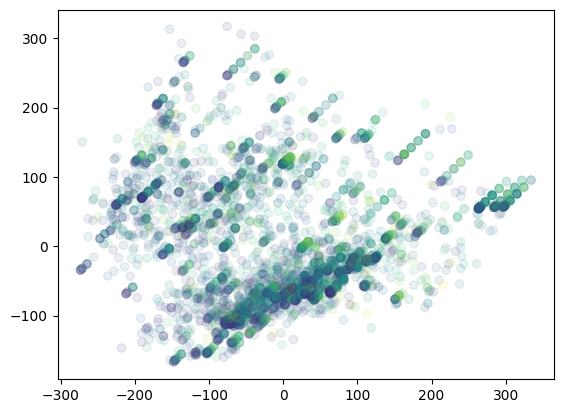

In [20]:
_ = plt.scatter(df['pca_0'], df["pca_1"], c=df['Strength'], alpha=0.1, cmap='viridis')

# No export necessary

There were not modifications made to the data.

# Analyze old dataset

In [21]:
OLD_FILE_PATH = Path.cwd() / "old.csv"
assert OLD_FILE_PATH.exists()
assert OLD_FILE_PATH.is_file()


In [27]:
old_df = pl.read_csv(OLD_FILE_PATH)
old_df

CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
f64,f64,f64,f64,f64,f64,f64,i64,f64
540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.3
266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.7
380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85


In [28]:
old_df.null_count()

CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


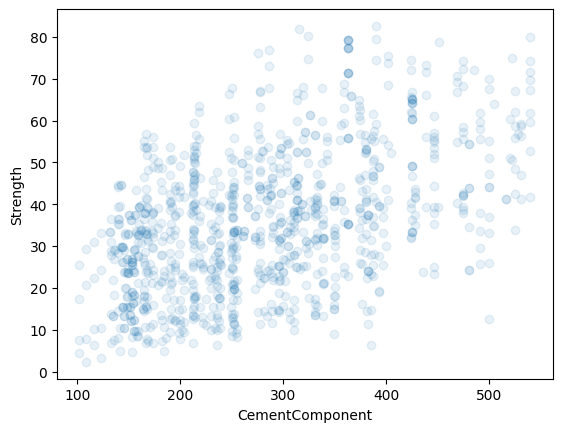

In [29]:
scatter_plot(old_df, 'CementComponent')


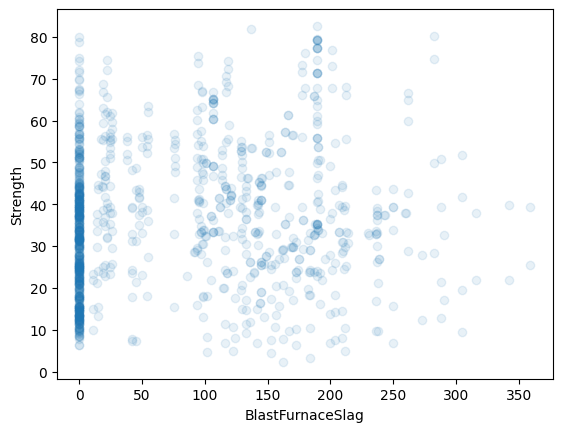

In [30]:
scatter_plot(old_df, 'BlastFurnaceSlag')

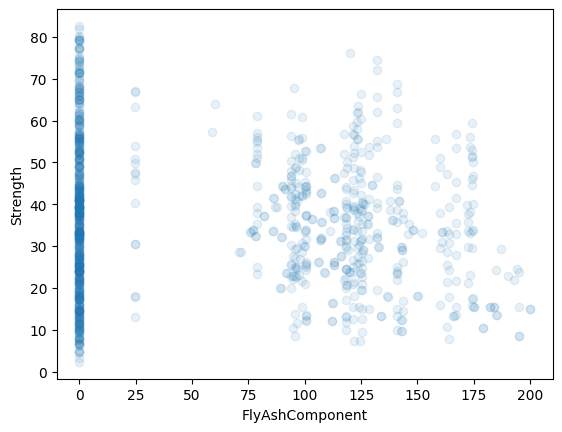

In [31]:
scatter_plot(old_df, 'FlyAshComponent')

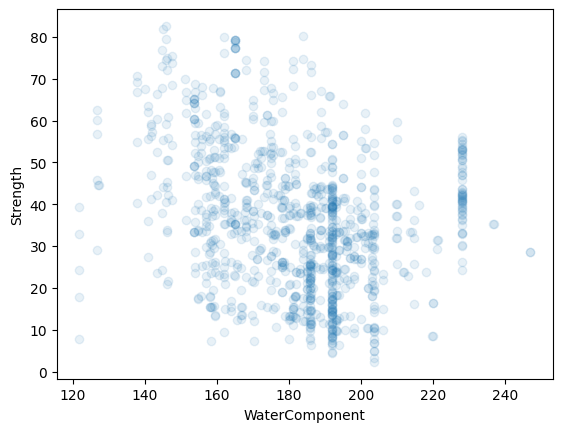

In [32]:
scatter_plot(old_df, 'WaterComponent')

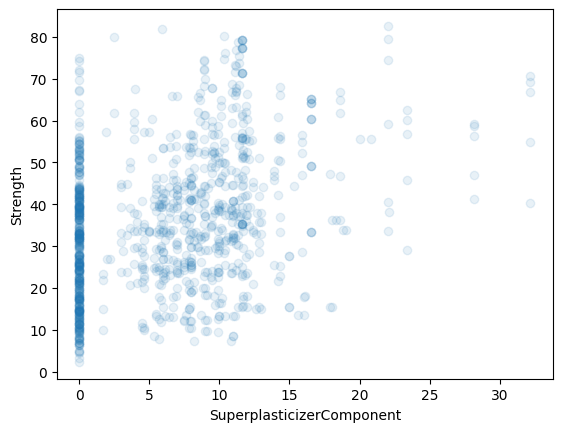

In [33]:
scatter_plot(old_df, 'SuperplasticizerComponent')

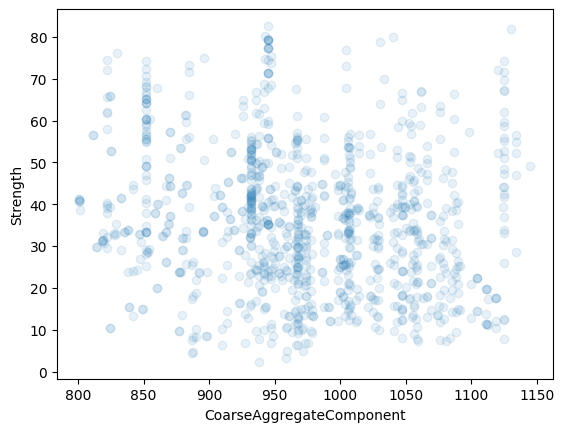

In [34]:
scatter_plot(old_df, 'CoarseAggregateComponent')

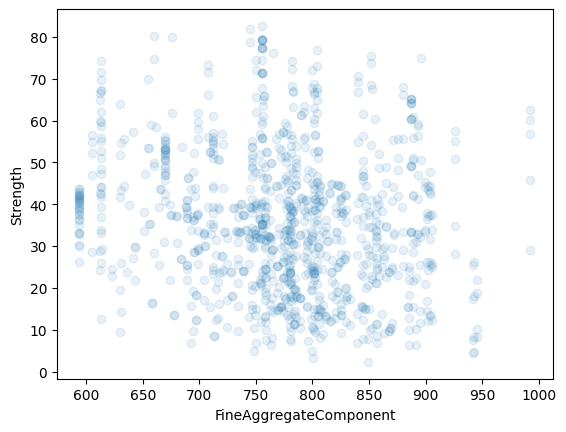

In [35]:
scatter_plot(old_df, 'FineAggregateComponent')

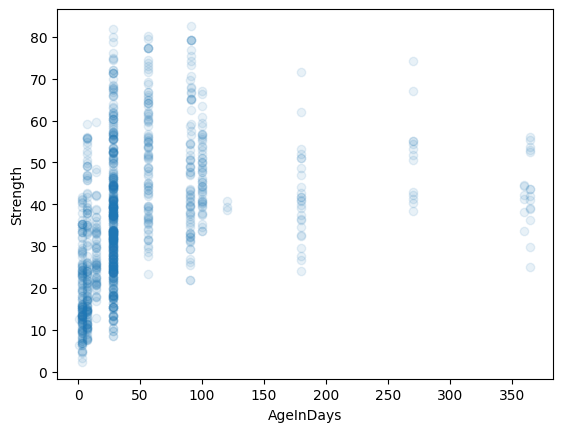

In [36]:
scatter_plot(old_df, 'AgeInDays')

## PCA

In [38]:
transformed = pca.fit_transform(
    old_df.select(pl.exclude(["Strength"])).to_numpy()
)
old_df = old_df.with_columns([
    pl.Series(name='pca_0', values=transformed[:, 0]),
    pl.Series(name='pca_1', values=transformed[:, 1]),
])

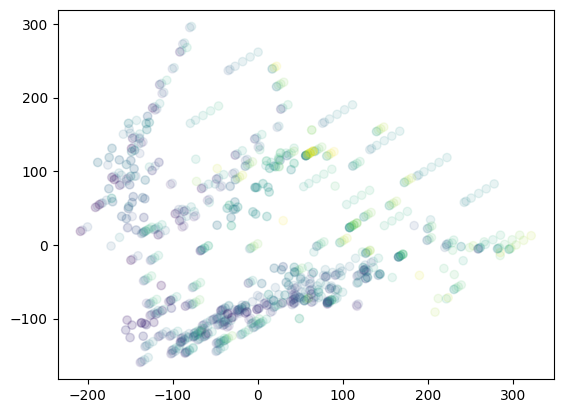

In [39]:
_ = plt.scatter(old_df['pca_0'], old_df["pca_1"], c=old_df['Strength'], alpha=0.1, cmap='viridis')